# FEATURE SELECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb
import joblib
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only=False)

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
df =pd.read_csv('listings2.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20201013162227,2020-10-21,Berlin-Mitte Value! Quiet courtyard/very central,Great location! <br />30 of 75 sq meters. Thi...,It is located in the former East Berlin area o...,https://a0.muscache.com/pictures/260fd609-710a...,2217,https://www.airbnb.com/users/show/2217,Ion,2008-08-18,"Key Biscayne, Florida, United States",Isn’t sharing economy great?,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/21428...,https://a0.muscache.com/im/pictures/user/21428...,Mitte,7.0,7.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Germany",Brunnenstr. Süd,Mitte,52.53454,13.40256,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,0.0,"[""Long term stays allowed"", ""Essentials"", ""Gar...",$61.14,5,1125,5.0,29.0,1125.0,1125.0,8.5,1125.0,NaN,t,30,60,90,180,2020-10-21,134,4,1,2016-04-11,2020-09-26,93.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,f,6,6,0,0,2.43
1,3176,https://www.airbnb.com/rooms/3176,20201013162227,2020-10-20,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,NaN,NaN,67%,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Germany",Prenzlauer Berg Südwest,Pankow,52.53500,13.41758,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Wifi"", ""Iron"", ""Smoke alarm"", ""Hangers"", ""Ki...",$90.00,62,1125,62.0,62.0,1125.0,1125.0,62.0,1125.0,NaN,t,18,48,78,353,2020-10-20,146,1,0,2009-06-20,2020-05-27,93.0,9.0,9.0,9.0,9.0,10.0,9.0,NaN,f,1,1,0,0,1.06
2,3309,https://www.airbnb.com/rooms/3309,20201013162227,2020-10-21,BerlinSpot Schöneberg near KaDeWe,First of all:<br />I prefer short-notice booki...,"My flat is in the middle of West-Berlin, direc...",https://a0.muscache.com/pictures/29054294/b1fa...,4108,https://www.airbnb.com/users/show/4108,Jana,2008-11-07,"Berlin, Berlin, Germany",ENJOY EVERY DAY AS IF IT'S YOUR LAST!!! \r\n\r...,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/d8049...,https://a0.muscache.com/im/pictures/user/d8049...,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,"Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,52.49885,13.34906,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Wifi"", ""Iron"", ""Smoke alarm"", ""Hangers"", ""Ca...",$28.57,7,35,7.0,7.0,35.0,35.0,7.0,35.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20227 entries, 0 to 20226
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20227 non-null  int64  
 1   listing_url                                   20227 non-null  object 
 2   scrape_id                                     20227 non-null  int64  
 3   last_scraped                                  20227 non-null  object 
 4   name                                          20195 non-null  object 
 5   description                                   19709 non-null  object 
 6   neighborhood_overview                         11054 non-null  object 
 7   picture_url                                   20227 non-null  object 
 8   host_id                                       20227 non-null  int64  
 9   host_url                                      20227 non-null 

# Feature Selection 

In [4]:
df1 = df[['price','host_response_rate','availability_365','neighbourhood_group_cleansed','host_is_superhost','property_type',
          'accommodates','room_type','bathrooms_text','bedrooms','beds','minimum_nights',
          'review_scores_rating','amenities','instant_bookable','calculated_host_listings_count']]

In [5]:
df1

,price,host_response_rate,availability_365,neighbourhood_group_cleansed,host_is_superhost,property_type,accommodates,room_type,bathrooms_text,bedrooms,beds,minimum_nights,review_scores_rating,amenities,instant_bookable,calculated_host_listings_count
0,$61.14,100%,180,Mitte,f,Entire guesthouse,3,Entire home/apt,1 bath,1.0,0.0,5,93.0,"[""Long term stays allowed"", ""Essentials"", ""Gar...",f,6
1,$90.00,NaN,353,Pankow,f,Entire apartment,4,Entire home/apt,1 bath,1.0,2.0,62,93.0,"[""Wifi"", ""Iron"", ""Smoke alarm"", ""Hangers"", ""Ki...",f,1
2,$28.57,100%,293,Tempelhof - Schöneberg,f,Private room in apartment,1,Private room,1 shared bath,1.0,1.0,7,89.0,"[""Wifi"", ""Iron"", ""Smoke alarm"", ""Hangers"", ""Ca...",f,1
3,$33.00,NaN,0,Pankow,t,Private room in apartment,2,Private room,1 shared bath,1.0,2.0,1,97.0,"[""Wifi"", ""Hangers"", ""Refrigerator"", ""Extra pil...",t,1
4,$180.00,NaN,29,Pankow,f,Entire apartment,7,Entire home/apt,2.5 baths,4.0,7.0,6,100.0,"[""Babysitter recommendations"", ""Room-darkening...",f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20222,$35.00,100%,0,Mitte,f,Private room in apartment,2,Private room,1 private bath,NaN,1.0,1,NaN,"[""TV"", ""Iron"", ""Wifi"", ""Hangers"", ""Lock on bed...",t,1
20223,$37.00,100%,5,Mitte,f,Entire apartment,2,Entire home/apt,1 bath,1.0,1.0,25,NaN,"[""Essentials"", ""Hangers"", ""Air conditioning"", ...",t,1
20224,$41.00,NaN,0,Mitte,f,Entire apartment,2,Entire home/apt,1 bath,NaN,2.0,2,NaN,"[""Wifi"", ""Smoke alarm"", ""Kitchen"", ""Washer"", ""...",t,1
20225,$89.86,100%,352,Tempelhof - Schöneberg,f,Entire apartment,8,Entire home/apt,1 bath,2.0,4.0,1,NaN,"[""Wifi"", ""Iron"", ""Smoke alarm"", ""Hangers"", ""Ki...",t,3


# Subseting and Limiting features to support our needs

In [6]:
df1=df1.loc[(df['accommodates']>=3)&(df1['availability_365']>=30)]
df1

,price,host_response_rate,availability_365,neighbourhood_group_cleansed,host_is_superhost,property_type,accommodates,room_type,bathrooms_text,bedrooms,beds,minimum_nights,review_scores_rating,amenities,instant_bookable,calculated_host_listings_count
0,$61.14,100%,180,Mitte,f,Entire guesthouse,3,Entire home/apt,1 bath,1.0,0.0,5,93.0,"[""Long term stays allowed"", ""Essentials"", ""Gar...",f,6
1,$90.00,NaN,353,Pankow,f,Entire apartment,4,Entire home/apt,1 bath,1.0,2.0,62,93.0,"[""Wifi"", ""Iron"", ""Smoke alarm"", ""Hangers"", ""Ki...",f,1
6,$90.00,NaN,289,Friedrichshain-Kreuzberg,f,Entire apartment,5,Entire home/apt,1 bath,1.0,3.0,60,94.0,"[""Essentials"", ""Hangers"", ""Wifi"", ""High chair""...",f,2
8,$159.00,100%,175,Pankow,t,Entire loft,4,Entire home/apt,1 bath,2.0,2.0,3,89.0,"[""Washer"", ""Elevator"", ""TV"", ""Dishes and silve...",f,1
9,$70.00,NaN,291,Friedrichshain-Kreuzberg,f,Entire apartment,4,Entire home/apt,1 bath,1.0,2.0,60,95.0,"[""Wifi"", ""Iron"", ""Hangers"", ""Kitchen"", ""Childr...",f,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20212,$150.00,NaN,90,Charlottenburg-Wilm.,f,Private room in apartment,5,Private room,2 shared baths,1.0,6.0,1,NaN,"[""Wifi"", ""Iron"", ""Smoke alarm"", ""Hangers"", ""Ki...",t,3
20214,$90.00,NaN,157,Treptow - Köpenick,f,Entire apartment,6,Entire home/apt,1.5 baths,3.0,5.0,1,100.0,"[""Wifi"", ""Smoke alarm"", ""Dishes and silverware...",t,1
20215,$158.00,100%,190,Tempelhof - Schöneberg,f,Entire apartment,8,Entire home/apt,2 baths,4.0,7.0,1,NaN,"[""Hangers"", ""Cable TV"", ""Hot water"", ""Bed line...",f,10
20225,$89.86,100%,352,Tempelhof - Schöneberg,f,Entire apartment,8,Entire home/apt,1 bath,2.0,4.0,1,NaN,"[""Wifi"", ""Iron"", ""Smoke alarm"", ""Hangers"", ""Ki...",t,3


## Renaming Columns

- To visualize it better

In [7]:
df1.rename(columns = {"neighbourhood_group_cleansed": "neighbourhood_group" },inplace=True) 

In [8]:
df1.isna().sum()

price                               0
host_response_rate                542
availability_365                    0
neighbourhood_group                 0
host_is_superhost                   0
property_type                       0
accommodates                        0
room_type                           0
bathrooms_text                      6
bedrooms                          230
beds                               28
minimum_nights                      0
review_scores_rating              574
amenities                           0
instant_bookable                    0
calculated_host_listings_count      0
dtype: int64

# Investigating each columns with NaN, checking missing values and Handling missing Values 

## Host is Superhost

In [9]:
df1['host_is_superhost'].unique()

array(['f', 't'], dtype=object)

In [10]:
df1['host_is_superhost'].value_counts()

f    2659
t     933
Name: host_is_superhost, dtype: int64

In [11]:
df1['host_is_superhost'] = df1['host_is_superhost'].fillna('f')

In [12]:
df1['host_is_superhost'].isna().sum()

0

## Amenities

In [13]:
df1.amenities.to_frame()
df1['amenities']=df1['amenities'].apply(lambda x:len(x.split(','))-1)
df1['amenities']

0        29
1        13
6        16
8        24
9        14
         ..
20212    11
20214    17
20215    27
20225    18
20226    26
Name: amenities, Length: 3592, dtype: int64

## Bathrooms

In [14]:
df1['bathrooms_text'].unique()

array(['1 bath', '2.5 baths', '1.5 shared baths', '1.5 baths', '2 baths',
       '1 shared bath', nan, '2 shared baths', '0 baths',
       '0 shared baths', '1 private bath', '4.5 baths', '3 baths',
       '4 baths', '4 shared baths', '3 shared baths', 'Half-bath',
       '3.5 baths', '7 baths', '2.5 shared baths', 'Shared half-bath',
       '5 shared baths', '8.5 shared baths', '32 baths', '18 baths'],
      dtype=object)

In [15]:
df1['bathrooms']=df1['bathrooms_text'].map({'1 bath':1,"2.5 baths":2.5,"0 baths":0,'1.5 baths': 1.5,'2 baths':2,
                                          'Half-bath':0.5,'4 baths':4 ,'nan':0})
df1.drop(columns=['bathrooms_text'],inplace=True)
df1.head(2)

,price,host_response_rate,availability_365,neighbourhood_group,host_is_superhost,property_type,accommodates,room_type,bedrooms,beds,minimum_nights,review_scores_rating,amenities,instant_bookable,calculated_host_listings_count,bathrooms
0,$61.14,100%,180,Mitte,f,Entire guesthouse,3,Entire home/apt,1.0,0.0,5,93.0,29,f,6,1.0
1,$90.00,NaN,353,Pankow,f,Entire apartment,4,Entire home/apt,1.0,2.0,62,93.0,13,f,1,1.0


In [16]:
df1.isnull().sum()

price                               0
host_response_rate                542
availability_365                    0
neighbourhood_group                 0
host_is_superhost                   0
property_type                       0
accommodates                        0
room_type                           0
bedrooms                          230
beds                               28
minimum_nights                      0
review_scores_rating              574
amenities                           0
instant_bookable                    0
calculated_host_listings_count      0
bathrooms                         576
dtype: int64

In [17]:
df1['bathrooms'] = df1['bathrooms'].fillna(value=0)

## Price

### Removing the '$' sign in price column

In [18]:
df1['price'] = df1['price'].str.replace('$', '')
df1['price'] = df1['price'].str.replace(',', '')
df1['price'].unique()

array(['61.14', '90.00', '159.00', '70.00', '160.00', '135.00', '65.00',
       '113.00', '74.00', '35.00', '37.00', '105.00', '81.00', '136.00',
       '154.00', '51.00', '120.00', '79.00', '60.00', '521.00', '75.00',
       '119.00', '68.00', '59.00', '55.00', '80.00', '25.00', '161.00',
       '110.00', '49.00', '78.00', '103.00', '157.00', '170.00', '85.00',
       '52.00', '89.00', '100.00', '82.00', '84.00', '45.00', '42.00',
       '190.00', '63.86', '150.00', '93.00', '69.00', '50.00', '98.43',
       '61.00', '56.00', '30.00', '95.00', '58.00', '17.00', '16.00',
       '125.00', '240.00', '44.00', '53.00', '47.00', '72.00', '64.00',
       '32.00', '109.00', '23.00', '130.00', '180.00', '139.00', '140.00',
       '101.00', '179.00', '245.00', '76.00', '77.00', '40.00', '46.00',
       '98.00', '106.00', '43.00', '107.00', '63.00', '199.00', '455.00',
       '42.71', '500.00', '31.00', '141.00', '86.00', '27.00', '57.00',
       '280.00', '149.00', '83.00', '118.00', '200.00', 

#### Converting Price Column to numeric datatype

In [19]:
df1['price'] = pd.to_numeric(df1['price'])

In [20]:
df1.info()
df1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 20226
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           3592 non-null   float64
 1   host_response_rate              3050 non-null   object 
 2   availability_365                3592 non-null   int64  
 3   neighbourhood_group             3592 non-null   object 
 4   host_is_superhost               3592 non-null   object 
 5   property_type                   3592 non-null   object 
 6   accommodates                    3592 non-null   int64  
 7   room_type                       3592 non-null   object 
 8   bedrooms                        3362 non-null   float64
 9   beds                            3564 non-null   float64
 10  minimum_nights                  3592 non-null   int64  
 11  review_scores_rating            3018 non-null   float64
 12  amenities                       3

price                               0
host_response_rate                542
availability_365                    0
neighbourhood_group                 0
host_is_superhost                   0
property_type                       0
accommodates                        0
room_type                           0
bedrooms                          230
beds                               28
minimum_nights                      0
review_scores_rating              574
amenities                           0
instant_bookable                    0
calculated_host_listings_count      0
bathrooms                           0
dtype: int64

In [21]:
df1['price'].unique()

array([  61.14,   90.  ,  159.  ,   70.  ,  160.  ,  135.  ,   65.  ,
        113.  ,   74.  ,   35.  ,   37.  ,  105.  ,   81.  ,  136.  ,
        154.  ,   51.  ,  120.  ,   79.  ,   60.  ,  521.  ,   75.  ,
        119.  ,   68.  ,   59.  ,   55.  ,   80.  ,   25.  ,  161.  ,
        110.  ,   49.  ,   78.  ,  103.  ,  157.  ,  170.  ,   85.  ,
         52.  ,   89.  ,  100.  ,   82.  ,   84.  ,   45.  ,   42.  ,
        190.  ,   63.86,  150.  ,   93.  ,   69.  ,   50.  ,   98.43,
         61.  ,   56.  ,   30.  ,   95.  ,   58.  ,   17.  ,   16.  ,
        125.  ,  240.  ,   44.  ,   53.  ,   47.  ,   72.  ,   64.  ,
         32.  ,  109.  ,   23.  ,  130.  ,  180.  ,  139.  ,  140.  ,
        101.  ,  179.  ,  245.  ,   76.  ,   77.  ,   40.  ,   46.  ,
         98.  ,  106.  ,   43.  ,  107.  ,   63.  ,  199.  ,  455.  ,
         42.71,  500.  ,   31.  ,  141.  ,   86.  ,   27.  ,   57.  ,
        280.  ,  149.  ,   83.  ,  118.  ,  200.  ,   87.  ,  121.  ,
        114.  ,   97

## Host response rate

In [22]:
df1['host_response_rate'].unique()

array(['100%', nan, '86%', '83%', '71%', '67%', '70%', '54%', '72%',
       '80%', '99%', '0%', '94%', '88%', '75%', '69%', '90%', '50%',
       '89%', '91%', '93%', '78%', '33%', '40%', '43%', '73%', '97%',
       '20%', '25%', '57%', '60%', '92%', '30%', '96%', '81%', '76%',
       '17%', '98%', '87%', '63%', '77%', '82%', '29%', '79%', '56%',
       '74%', '64%', '6%', '44%', '95%', '85%', '10%', '13%', '59%',
       '65%', '32%', '14%'], dtype=object)

In [23]:
df1['host_response_rate'] = df1['host_response_rate'].fillna(value=0)

In [24]:
df1['host_response_rate'] = df1['host_response_rate'].str.replace('%', '')

### Converting host reponse rate column to numeric datatype

In [25]:
df1['host_response_rate'] = pd.to_numeric(df1['host_response_rate'])

#### Filling empty values with 0

In [26]:
df1['host_response_rate']= df1['host_response_rate'].fillna(value=0)

In [27]:
df1.isna().sum()

price                               0
host_response_rate                  0
availability_365                    0
neighbourhood_group                 0
host_is_superhost                   0
property_type                       0
accommodates                        0
room_type                           0
bedrooms                          230
beds                               28
minimum_nights                      0
review_scores_rating              574
amenities                           0
instant_bookable                    0
calculated_host_listings_count      0
bathrooms                           0
dtype: int64

## Bedrooms

In [28]:
print(df1['bedrooms'].unique())
df1['bedrooms'] = df1['bedrooms'].fillna(value=1)

[ 1.  2.  3. nan  5.  4.  8.  6. 12.  7. 32. 18.]


#### Filling empty values in bedrooms column and replacing it with 1, because there is at least 1 bedroom for each accommodation, even whether it is a Motel.

In [29]:
df1.isna().sum()

price                               0
host_response_rate                  0
availability_365                    0
neighbourhood_group                 0
host_is_superhost                   0
property_type                       0
accommodates                        0
room_type                           0
bedrooms                            0
beds                               28
minimum_nights                      0
review_scores_rating              574
amenities                           0
instant_bookable                    0
calculated_host_listings_count      0
bathrooms                           0
dtype: int64

## Beds

In [30]:
print(df1['beds'].unique())
df1['beds'] = df1['beds'].fillna(value=0)

[ 0.  2.  3.  4.  1. 10.  6. 15.  5.  8.  7.  9. 16. 12. 11. nan 14. 17.
 96. 72. 18. 24.]


#### Filling empty values in beds column and replacing it with 0, asumming guests sleep on a coach or any kind of mattress.

In [31]:
df1.isna().sum()

price                               0
host_response_rate                  0
availability_365                    0
neighbourhood_group                 0
host_is_superhost                   0
property_type                       0
accommodates                        0
room_type                           0
bedrooms                            0
beds                                0
minimum_nights                      0
review_scores_rating              574
amenities                           0
instant_bookable                    0
calculated_host_listings_count      0
bathrooms                           0
dtype: int64

## Review Scores Rating

In [32]:
df1['review_scores_rating'].unique()

array([ 93.,  94.,  89.,  95.,  96.,  90.,  98.,  92.,  91.,  81.,  97.,
        99., 100.,  87.,  88.,  82.,  nan,  80.,  83.,  56.,  76.,  86.,
        85.,  84.,  53.,  75.,  40.,  78.,  67.,  77.,  72.,  74.,  60.,
        73.,  79.,  47.,  65.,  70.,  20.,  71.,  64.,  50.,  68.])

In [33]:
df1['review_scores_rating']= df1['review_scores_rating'].fillna(value=0)

In [34]:
df1["property_type"] = df1["property_type"].apply(lambda x: "Entire property" if x=='Entire guesthouse' or x=='Entire apartment' or x== 'Entire loft' or x=='Entire guest suite' or x== 'Entire house' or x == 'Entire townhouse' or x=='Entire condominium' or x=='Entire serviced apartment' or x == 'Entire place' or x =='Entire bungalow' or x=='Entire chalet'or x=='Entire floor'or x=='Entire cottage'or x=='Entire cabin'or x=='Entire villa' or x=='Tiny house' else x)
df1["property_type"] = df1["property_type"].apply(lambda x: "Private Room" if x == 'Private room in apartment' or x == 'Private room in loft' or x=='Private room in hostel' or x=='Private room in house' or x== 'Private room' or x== 'Private room in condominium' or x=='Private room in townhouse'or x=='Private room in bed and breakfast' or x=='Private room in houseboat' or x=='Private room in guest suite' or x =='Private room in villa' or x=='Private room in pension' or x=='Private room in serviced apartment' or x=='Private room in barn' or x=='Private room in guesthouse' else x)
df1["property_type"] = df1["property_type"].apply(lambda x: "Shared Room" if x== 'Shared room in hostel'or x=='Shared room in apartment' or x== 'Shared room in loft' or x=='Room in boutique hotel' or x== 'Room in hostel' or x=='Room in aparthotel' or x =='Room in hotel' or x =='Room in bed and breakfast' or x == 'Room in serviced apartment'or x =='Shared room in boutique hotel' or x==  'Shared room in aparthotel' or x== 'Shared room in bed and breakfast' else x)
df1["property_type"] = df1["property_type"].apply(lambda x: "Other" if x== 'Boat'or x=='Houseboat' or x== 'Camper/RV' else x) 
df1["property_type"].unique()

array(['Entire property', 'Private Room', 'Shared Room', 'Other'],
      dtype=object)

In [35]:
df1.isna().sum()

price                             0
host_response_rate                0
availability_365                  0
neighbourhood_group               0
host_is_superhost                 0
property_type                     0
accommodates                      0
room_type                         0
bedrooms                          0
beds                              0
minimum_nights                    0
review_scores_rating              0
amenities                         0
instant_bookable                  0
calculated_host_listings_count    0
bathrooms                         0
dtype: int64

In [36]:
df1.head()

,price,host_response_rate,availability_365,neighbourhood_group,host_is_superhost,property_type,accommodates,room_type,bedrooms,beds,minimum_nights,review_scores_rating,amenities,instant_bookable,calculated_host_listings_count,bathrooms
0,61.14,100.0,180,Mitte,f,Entire property,3,Entire home/apt,1.0,0.0,5,93.0,29,f,6,1.0
1,90.00,0.0,353,Pankow,f,Entire property,4,Entire home/apt,1.0,2.0,62,93.0,13,f,1,1.0
6,90.00,0.0,289,Friedrichshain-Kreuzberg,f,Entire property,5,Entire home/apt,1.0,3.0,60,94.0,16,f,2,1.0
8,159.00,100.0,175,Pankow,t,Entire property,4,Entire home/apt,2.0,2.0,3,89.0,24,f,1,1.0
9,70.00,0.0,291,Friedrichshain-Kreuzberg,f,Entire property,4,Entire home/apt,1.0,2.0,60,95.0,14,f,2,1.0


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 20226
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           3592 non-null   float64
 1   host_response_rate              3592 non-null   float64
 2   availability_365                3592 non-null   int64  
 3   neighbourhood_group             3592 non-null   object 
 4   host_is_superhost               3592 non-null   object 
 5   property_type                   3592 non-null   object 
 6   accommodates                    3592 non-null   int64  
 7   room_type                       3592 non-null   object 
 8   bedrooms                        3592 non-null   float64
 9   beds                            3592 non-null   float64
 10  minimum_nights                  3592 non-null   int64  
 11  review_scores_rating            3592 non-null   float64
 12  amenities                       3

<AxesSubplot:>

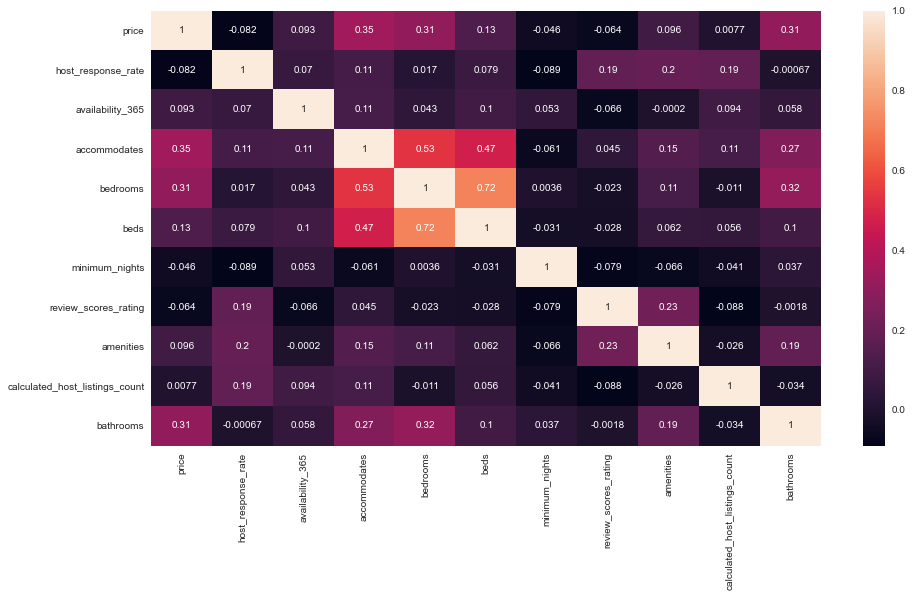

In [38]:
plt.figure(figsize = (15 , 8))
sns.heatmap(df1.corr(), annot = True)

# Encoding 

In [39]:
df1['instant_bookable_encode']=df1['instant_bookable'].map({'f':0,'t':1})
df1.drop(columns=['instant_bookable'],inplace=True)
print(df1['instant_bookable_encode'].unique())

[0 1]


In [40]:
df1['host_is_superhost_encode']=df1['host_is_superhost'].map({'f':0,'t':1})
df1.drop(columns=['host_is_superhost'],inplace=True)
print(df1['host_is_superhost_encode'].unique())

[0 1]


In [41]:
df1=pd.get_dummies(data=df1,columns=['neighbourhood_group','room_type','property_type'])

df1.head()

,price,host_response_rate,availability_365,accommodates,bedrooms,beds,minimum_nights,review_scores_rating,amenities,calculated_host_listings_count,bathrooms,instant_bookable_encode,host_is_superhost_encode,neighbourhood_group_Charlottenburg-Wilm.,neighbourhood_group_Friedrichshain-Kreuzberg,neighbourhood_group_Lichtenberg,neighbourhood_group_Marzahn - Hellersdorf,neighbourhood_group_Mitte,neighbourhood_group_Neukölln,neighbourhood_group_Pankow,neighbourhood_group_Reinickendorf,neighbourhood_group_Spandau,neighbourhood_group_Steglitz - Zehlendorf,neighbourhood_group_Tempelhof - Schöneberg,neighbourhood_group_Treptow - Köpenick,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,property_type_Entire property,property_type_Other,property_type_Private Room,property_type_Shared Room
0,61.14,100.0,180,3,1.0,0.0,5,93.0,29,6,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,90.00,0.0,353,4,1.0,2.0,62,93.0,13,1,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
6,90.00,0.0,289,5,1.0,3.0,60,94.0,16,2,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8,159.00,100.0,175,4,2.0,2.0,3,89.0,24,1,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
9,70.00,0.0,291,4,1.0,2.0,60,95.0,14,2,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


## Target Engineering

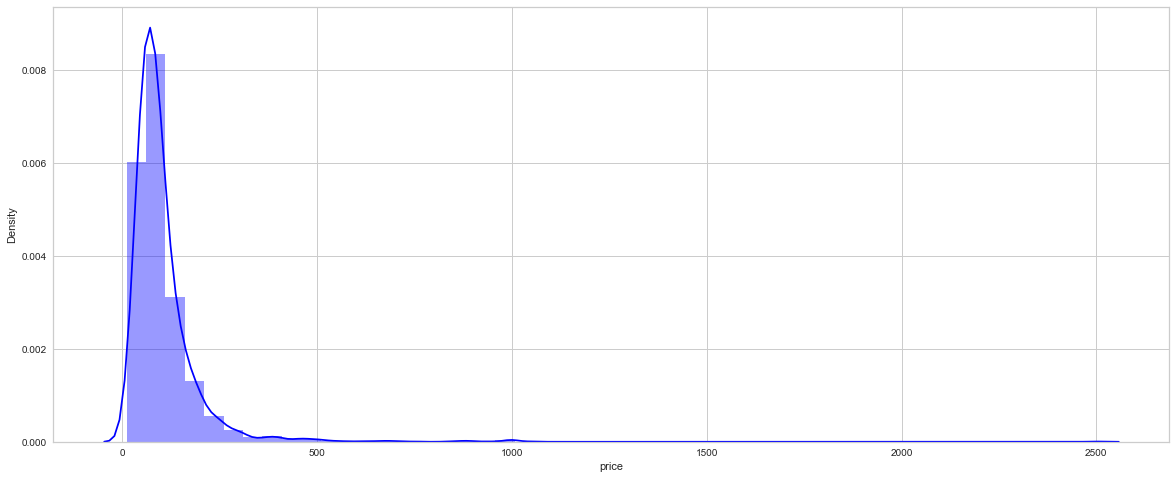

      price  count   percent
0     90.00    109  3.034521
1     80.00    108  3.006682
2     60.00    104  2.895323
3     65.00     89  2.477728
4    100.00     88  2.449889
..      ...    ...       ...
389   35.71      1  0.027840
390   35.29      1  0.027840
391   30.57      1  0.027840
392   27.86      1  0.027840
393   11.00      1  0.027840

[394 rows x 3 columns]


In [42]:
plt.figure(figsize = (20, 8))
sns.distplot(df1['price'], color='blue')
plt.show()

print(df1.stb.freq(['price'], cum_cols = False))

### Since the target column is not normal distributed, so it is need to be transformed

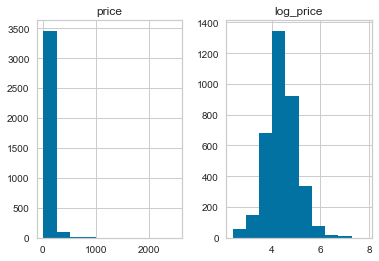

In [43]:
price=pd.DataFrame({'price':df1['price'],'log_price':np.log(df1['price'])})
price.hist()

plt.show()

### Since we got right skewed graph on our target columns, then we need to transform the data. In this case log is applied.

In [44]:
df1.head()

,price,host_response_rate,availability_365,accommodates,bedrooms,beds,minimum_nights,review_scores_rating,amenities,calculated_host_listings_count,bathrooms,instant_bookable_encode,host_is_superhost_encode,neighbourhood_group_Charlottenburg-Wilm.,neighbourhood_group_Friedrichshain-Kreuzberg,neighbourhood_group_Lichtenberg,neighbourhood_group_Marzahn - Hellersdorf,neighbourhood_group_Mitte,neighbourhood_group_Neukölln,neighbourhood_group_Pankow,neighbourhood_group_Reinickendorf,neighbourhood_group_Spandau,neighbourhood_group_Steglitz - Zehlendorf,neighbourhood_group_Tempelhof - Schöneberg,neighbourhood_group_Treptow - Köpenick,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,property_type_Entire property,property_type_Other,property_type_Private Room,property_type_Shared Room
0,61.14,100.0,180,3,1.0,0.0,5,93.0,29,6,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,90.00,0.0,353,4,1.0,2.0,62,93.0,13,1,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
6,90.00,0.0,289,5,1.0,3.0,60,94.0,16,2,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8,159.00,100.0,175,4,2.0,2.0,3,89.0,24,1,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
9,70.00,0.0,291,4,1.0,2.0,60,95.0,14,2,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


# Splitting Data

In [45]:
X = df1.drop(columns='price')
y = np.log(df1['price']) #Since the data is not normal distributed, we use log to transform its shape

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

X_train.columns

Index(['host_response_rate', 'availability_365', 'accommodates', 'bedrooms',
       'beds', 'minimum_nights', 'review_scores_rating', 'amenities',
       'calculated_host_listings_count', 'bathrooms',
       'instant_bookable_encode', 'host_is_superhost_encode',
       'neighbourhood_group_Charlottenburg-Wilm.',
       'neighbourhood_group_Friedrichshain-Kreuzberg',
       'neighbourhood_group_Lichtenberg',
       'neighbourhood_group_Marzahn - Hellersdorf',
       'neighbourhood_group_Mitte', 'neighbourhood_group_Neukölln',
       'neighbourhood_group_Pankow', 'neighbourhood_group_Reinickendorf',
       'neighbourhood_group_Spandau',
       'neighbourhood_group_Steglitz - Zehlendorf',
       'neighbourhood_group_Tempelhof - Schöneberg',
       'neighbourhood_group_Treptow - Köpenick', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'property_type_Entire property',
       'property_type_Other', 'property_type_Private

# MODEL BUILDING

### Random Forest Regressor

Evaluation Matrix Random Forest

MAE Score:  0.29421166223373657
MSE Score:  0.16459149841474482
RMSE Score:  0.4056987779310468
R2 :  0.5443877303887337

train score:  0.9364084467931406
test score:  0.5443877303887337


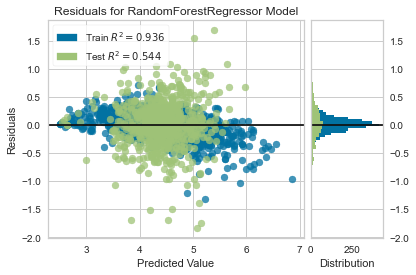

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
RF = RandomForestRegressor()

RF.fit(X_train, y_train)

y_base_RF = RF.predict(X_test)
RF_pred_train=RF.predict(X_train)

RF_train =  RF.score(X_train,y_train)

r2_model_RF= r2_score(y_test, y_base_RF)
MAE_model_RF = mean_absolute_error(y_test, y_base_RF)
MSE_model_RF= mean_squared_error(y_test, y_base_RF)
RMSE_model_RF= np.sqrt(MSE_model_RF)

print("Evaluation Matrix Random Forest\n")
print("MAE Score: ", MAE_model_RF)
print("MSE Score: ", MSE_model_RF)
print("RMSE Score: ", RMSE_model_RF)
print("R2 : ", r2_model_RF)

print('\ntrain score: ',r2_score(y_train, RF_pred_train))
print('test score: ',r2_score(y_test, y_base_RF))

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(RF)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Random Forest Regressor Tuned

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.4min finished


Evaluation Matrix Random Forest Tuned

MAE Score:  0.3086195047576141
MSE Score:  0.170061273392354
RMSE Score:  0.4123848607700748
R2 :  0.5292466288384474

train score:  0.6986091407810509
test score:  0.5292466288384474


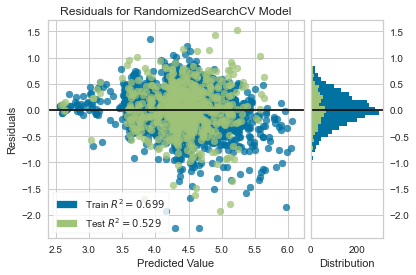

<AxesSubplot:title={'center':'Residuals for RandomizedSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [47]:
RF_tuning = RandomForestRegressor()

param_RF = {'max_depth':[3,7,9],
            'min_samples_leaf':[2, 5,9,3],
            'min_samples_split':[1, 5,6,7,8,9,10],
            'max_features':[0.1,0.3,0.9],
            'n_estimators':[100, 200, 450,500,600,900,1000]}


RF_tuned = RandomizedSearchCV(estimator=RF_tuning, param_distributions=param_RF, cv=5, n_iter=100, n_jobs=-1, verbose=1)
RF_tuned.fit(X_train, y_train)

RF_tuned_train = RF_tuned.best_score_
RF_model_tuned = RF_tuned.best_estimator_

y_RF_tuned =  RF_model_tuned.predict(X_test)
RF_tuned_train =  RF_model_tuned.predict(X_train)


r2_tuned_RF = r2_score(y_test, y_RF_tuned)
MAE_RF_tuned = mean_absolute_error(y_test, y_RF_tuned)
MSE_RF_tuned = mean_squared_error(y_test, y_RF_tuned)
RMSE_RF_tuned = np.sqrt(MSE_RF_tuned)

print("Evaluation Matrix Random Forest Tuned\n")
print("MAE Score: ", MAE_RF_tuned)
print("MSE Score: ", MSE_RF_tuned)
print("RMSE Score: ", RMSE_RF_tuned)
print("R2 : ", r2_tuned_RF)

print('\ntrain score: ',r2_score(y_train, RF_tuned_train))
print('test score: ',r2_score(y_test, y_RF_tuned))

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(RF_tuned)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Ridge

Evaluation Matrix Ridge

MAE Score:  0.3413031750355062
MSE Score:  0.19479625267496437
RMSE Score:  0.44135728460620693
R2 :  0.46077674942013

train score:  0.4743940298145708
test score:  0.46077674942013


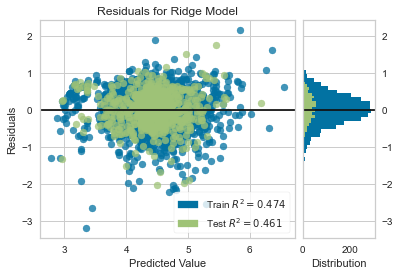

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [48]:
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha=7)

Ridge.fit(X_train, y_train)

y_model_Ridge = Ridge.predict(X_test)
Ridge_pred_train=Ridge.predict(X_train)

Ridge_train =  Ridge.score(X_train,y_train)

r2_model_Ridge= (r2_score(y_test, y_model_Ridge))
MAE_model_Ridge = mean_absolute_error(y_test, y_model_Ridge)
MSE_model_Ridge= mean_squared_error(y_test, y_model_Ridge)
RMSE_model_Ridge= np.sqrt(MSE_model_Ridge)

print("Evaluation Matrix Ridge\n")
print("MAE Score: ", MAE_model_Ridge)
print("MSE Score: ", MSE_model_Ridge)
print("RMSE Score: ", RMSE_model_Ridge)
print("R2 : ", r2_model_Ridge)

print('\ntrain score: ',r2_score(y_train, Ridge_pred_train))
print('test score: ',r2_score(y_test, y_model_Ridge))

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Ridge Tuned

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:   31.2s finished


Evaluation Matrix Ridge Tuned

MAE Score:  0.34043204634918084
MSE Score:  0.1941729022066331
RMSE Score:  0.44065054431673306
R2 :  0.4625022706309765

train score:  0.47720004468710797
test score:  0.4625022706309765


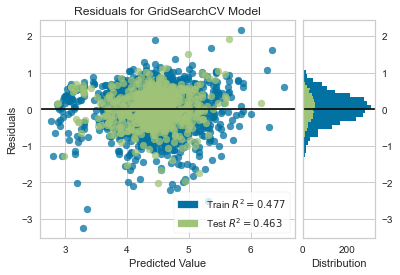

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [49]:
from sklearn.linear_model import Ridge

ridge_tuning = Ridge()
param_ridge = {'alpha':[1,5,9,13, 17, 300, 6000],
               'fit_intercept':[True, False],
              'normalize': [False, True],
              'copy_X':[True, False],
              'max_iter':[None, 10, 100, 1000,10000],
              'tol':[0.001, 0.005, 0.01]}

model_ridge_tuned = GridSearchCV(estimator = ridge_tuning, param_grid=param_ridge, n_jobs = -1, cv=5, verbose =1)
model_ridge_tuned.fit(X_train, y_train)

ridge_tuned_train = model_ridge_tuned.best_score_
ridge_tuned = model_ridge_tuned.best_estimator_

y_ridge_tuned =  ridge_tuned.predict(X_test)
Ridge_tuned_train = ridge_tuned.predict(X_train)

r2_tuned_ridge = r2_score(y_test, y_ridge_tuned)
MAE_ridge_tuned = mean_absolute_error(y_test, y_ridge_tuned)
MSE_ridge_tuned = mean_squared_error(y_test, y_ridge_tuned)
RMSE_ridge_tuned = np.sqrt(MSE_ridge_tuned)

print("Evaluation Matrix Ridge Tuned\n")
print("MAE Score: ", MAE_ridge_tuned)
print("MSE Score: ", MSE_ridge_tuned)
print("RMSE Score: ", RMSE_ridge_tuned)
print("R2 : ", r2_tuned_ridge)

print('\ntrain score: ',r2_score(y_train, Ridge_tuned_train))
print('test score: ',r2_score(y_test, y_ridge_tuned))

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model_ridge_tuned)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## XG Boost

Evaluation Matrix XG-Boost

MAE Score:  0.3092699642936205
MSE Score:  0.17057467737273016
RMSE Score:  0.4130068732754095
R2 :  0.5278254548715077

train score:  0.9507076296457418
test score:  0.5278254548715077


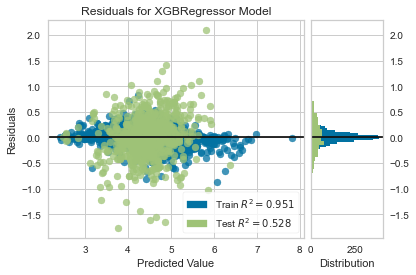

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
base_XGB = XGBRegressor()

base_XGB.fit(X_train, y_train)

y_base_XGB = base_XGB.predict(X_test)
XGB_pred_train=base_XGB.predict(X_train)

r2_base_XGB = r2_score(y_test, y_base_XGB)

r2_model_XGB= (r2_score(y_test, y_base_XGB))
MAE_model_XGB = mean_absolute_error(y_test, y_base_XGB)
MSE_model_XGB= mean_squared_error(y_test, y_base_XGB)
RMSE_model_XGB= np.sqrt(MSE_model_XGB)

print("Evaluation Matrix XG-Boost\n")
print("MAE Score: ", MAE_model_XGB)
print("MSE Score: ", MSE_model_XGB)
print("RMSE Score: ", RMSE_model_XGB)
print("R2 : ", r2_model_XGB)

print('\ntrain score: ',r2_score(y_train, XGB_pred_train))
print('test score: ',r2_score(y_test, y_base_XGB))

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(base_XGB)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## XG Boost Tuned

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.4s finished


[18:16:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Evaluation Matrix XG Boost Tuned

MAE Score:  0.29851890635556616
MSE Score:  0.15885117020584213
RMSE Score:  0.3985613757074839
R2 :  0.5602777610936089

train score:  0.795707849043485
test score:  0.5602777610936089


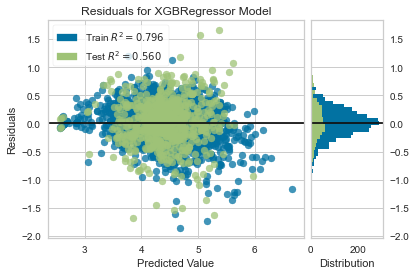

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [51]:
XGB_tuned =XGBRegressor()
param_XGB_tuned = {'max_depth': [120,150,200],
                 'learning_rate': [0.1, 0.3, 0.5, 1,2],
                 'n_estimator': [100],
                 'gamma': [0, 0.3, 0.5,0.7,1,2],
                 'colsample_bytree': [1, 1.4, 0.5],
                 'subsample':[1,5,7,20,70,90,100],
                 'reg_alpha':[0, 0.5, 1.0,2,7,10],
                 'reg_lambda':[1, 3,7]}

model_XGB_tuned = RandomizedSearchCV(estimator=XGB_tuned, param_distributions=param_XGB_tuned, cv=3, n_iter=100, n_jobs=-1, verbose=1)


model_XGB_tuned.fit(X_train, y_train)

XGB_tuned_train = model_XGB_tuned.best_score_
XGB_tuned = model_XGB_tuned.best_estimator_

y_XGB_tuned =  XGB_tuned.predict(X_test)
XGB_tuned_train = XGB_tuned.predict(X_train)

r2_tuned_XGB = r2_score(y_test, y_XGB_tuned)
MAE_XGB_tuned = mean_absolute_error(y_test, y_XGB_tuned)
MSE_XGB_tuned = mean_squared_error(y_test, y_XGB_tuned)
RMSE_XGB_tuned = np.sqrt(MSE_XGB_tuned)

print("Evaluation Matrix XG Boost Tuned\n")
print("MAE Score: ", MAE_XGB_tuned)
print("MSE Score: ", MSE_XGB_tuned)
print("RMSE Score: ", RMSE_XGB_tuned)
print("R2 : ", r2_tuned_XGB)

print('\ntrain score: ',r2_score(y_train, XGB_tuned_train))
print('test score: ',r2_score(y_test, y_XGB_tuned))

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(XGB_tuned)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [52]:
data = {
    "Random Forest" : [(r2_score(y_train, RF_pred_train)),(r2_score(y_test, y_base_RF))],
    "Random Forest Tuned" : [(r2_score(y_train, RF_tuned_train)),(r2_score(y_test, y_RF_tuned))],
    "Ridge" : [(r2_score(y_train, Ridge_pred_train)),(r2_score(y_test, y_model_Ridge))],
    "Ridge Tuned" : [r2_score(y_train, Ridge_tuned_train), (r2_score(y_test, y_ridge_tuned))],
    "XG Boost "  : [(r2_score(y_train, XGB_pred_train)),(r2_score(y_test, y_base_XGB))],
    "XG Boost Tuned" : [r2_score(y_train, XGB_tuned_train),r2_score(y_test, y_XGB_tuned)],
}
pd.DataFrame(data=data, index=['R2 Score Training', 'R2 Score Testing'])

,Random Forest,Random Forest Tuned,Ridge,Ridge Tuned,XG Boost,XG Boost Tuned
R2 Score Training,0.936408,0.698609,0.474394,0.477200,0.950708,0.795708
R2 Score Testing,0.544388,0.529247,0.460777,0.462502,0.527825,0.560278


# Explanation on  Evaluation Matrix for Regression Model


- R2 score is total for all the total error of prediction devided by total squared of actual data

- MAE score is |prediction - actual| data divided by number of data point

- MSE score is like variance of the error

- RMSE is the square root of the error or standard deviation of error

# Summary



- Among of all model XG Boost tuned has the highest r2 score compared to all other model and has the lowest RMSE. 

- However there are **overfitting** problem in all the models. 

- Better feature selections either adjusting tuning parameters needs to be implemented to avoid overfitting/underfitting.

- Several of imputations might have effect on the quality of the data due to bug / human error.

# Recommendation 

- Model needs to be improved to have a better prediction (it still have an overfitting problem needs a better feature selection)

- Improvement of data collection should be further gathered, i.e. 
    - How big the property/room is.
    - At what time could guess check in/out



# Export Model to joblib File

In [53]:
import joblib

In [54]:
joblib.dump(model_XGB_tuned,'XGB_tuned_model')

['XGB_tuned_model']